# Gradient Descent method

### Load libraries

In [13]:
# Base libraries
import numpy as np
import pandas as pd

# Plot libraries
import matplotlib.pyplot as plt

# Math libraries
import math

### Load dataset

In [14]:
# Load the dataset
dataset = pd.read_csv("Data/student_habits_performance_clean.csv", encoding='utf-8')
target_col = 'exam score [scale 1-10]'
print(dataset.columns.tolist())


['student_id', 'age [years]', 'gender', 'study hours per day', 'social media hours', 'Netflix hours', 'part_time_job', 'attendance percentage', 'sleep hours', 'diet_quality', 'exercise frequency [times/week]', 'parental_education_level', 'internet_quality', 'mental health rating [scale 1-10]', 'extracurricular_participation', 'exam score [scale 1-10]']


### Data Standardization and Design Matrix Construction for Regression

In [15]:
def standardize(x):
    """Standardize data to mean 0 and std dev 1."""
    return (x - np.mean(x)) / np.std(x)

def build_model_data(x, y):
    """Get regression data in matrix form."""
    b = y
    num_samples = len(b)
    A = np.c_[np.ones(num_samples), x]  # Add intercept column
    return A, b

# Select all numeric columns except 'student_id' and target
numeric_cols = dataset.select_dtypes(include=[np.number]).columns.tolist()
if 'student_id' in numeric_cols:
    numeric_cols.remove('student_id')
if target_col in numeric_cols:
    numeric_cols.remove(target_col)

# Extract features and target
features = dataset[numeric_cols].values
target = dataset['exam score [scale 1-10]'].values

# Standardize all numeric features
features_standardized = np.apply_along_axis(standardize, 0, features)
target_standardized = standardize(target)

# Build the model data matrix with intercept
A, b = build_model_data(features_standardized, target_standardized)


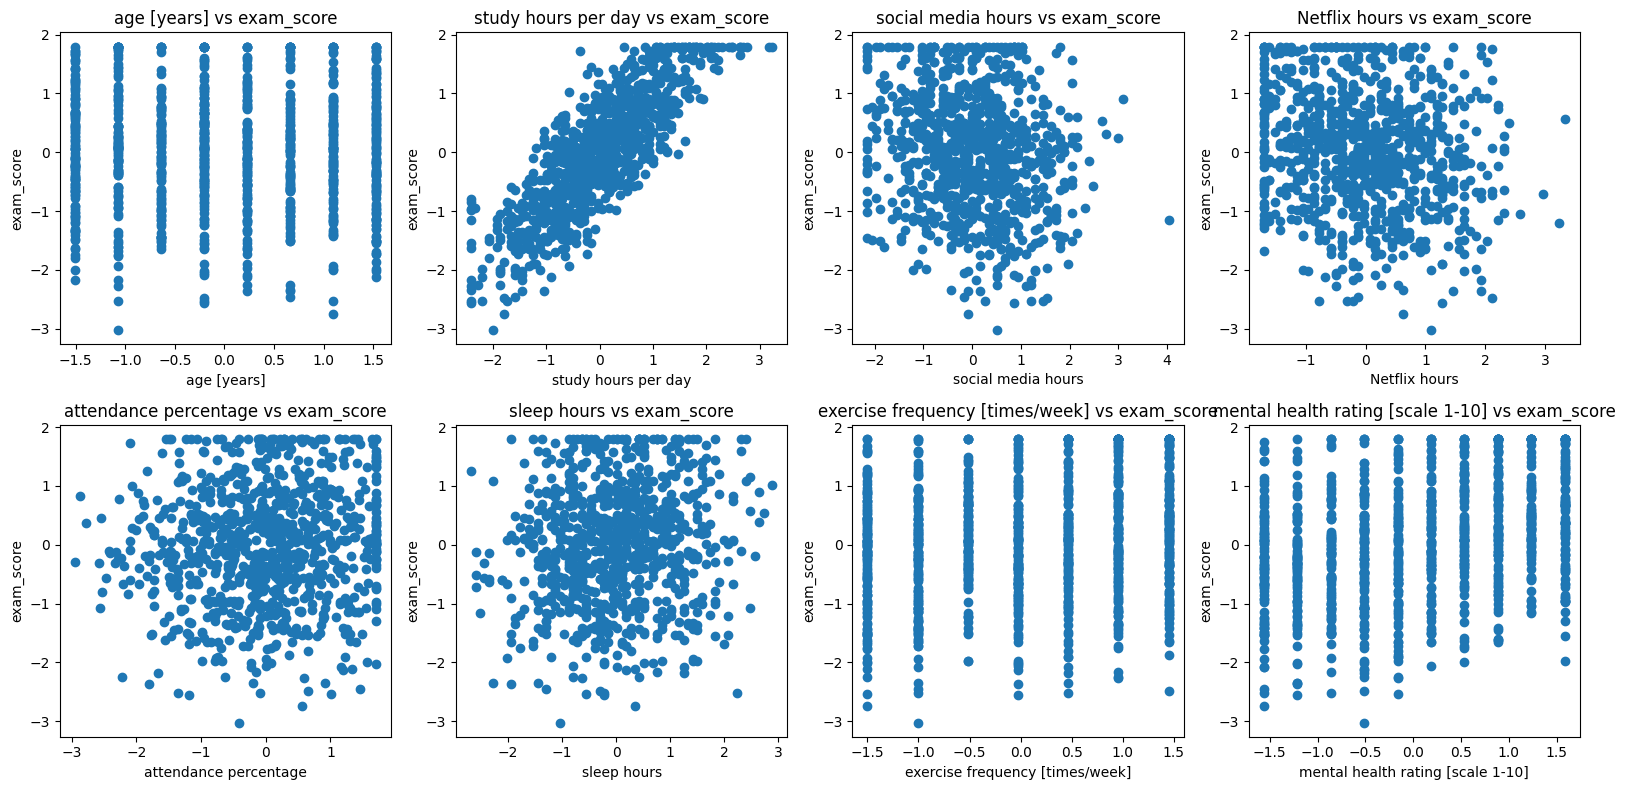

In [16]:
num_features = A.shape[1] - 1

num_cols = 4
num_rows = math.ceil(num_features / num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(4*num_cols, 4*num_rows))
axes = axes.flatten()

for i in range(num_features):
    axes[i].scatter(A[:, i+1], b)
    axes[i].set_xlabel(numeric_cols[i])
    axes[i].set_ylabel('exam_score')
    axes[i].set_title(f'{numeric_cols[i]} vs exam_score')

for j in range(num_features, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [17]:
def calculate_objective(Axmb):
    """Calculate ||Ax - b||^2 for the vector Axmb = Ax - b"""
    obj = 0.5 * (Axmb**2).sum()
    return obj

def compute_gradient(A, x, b):
    """Compute the gradient and objective function."""
    Axmb = A.dot(x) - b
    grad = A.T.dot(Axmb)
    return grad, Axmb

def gradient_descent(A, initial_x, b, max_iters, gamma, tol=1e-6):
    """Gradient descent algorithm with convergence check."""
    xs = [initial_x]
    objectives = []
    x = initial_x
    
    for n_iter in range(max_iters):
        grad, Axmb = compute_gradient(A, x, b)
        obj = calculate_objective(Axmb)
        x = x - gamma * grad
        
        xs.append(x)
        objectives.append(obj)
        
        print("Gradient Descent({bi}/{ti}): objective={l:.5f}, x={w}".format(
        bi=n_iter + 1, ti=max_iters, l=obj,
        w=np.array2string(x, precision=5, separator=", ",
                       formatter={'float_kind':lambda x: f"{x:.5f}"})))
        # Controlla convergenza
        if n_iter > 0:
            if abs(objectives[-1] - objectives[-2]) < tol:
                print()
                print(f"✅ Convergence reached after {n_iter+1} iterations.")
                break
    return objectives, xs

## Naive test


In [18]:
# Define the parameters of the algorithm.
max_iters = 300
gamma = 0.001  # gamma = 0.01 does not converge

# Initialization
x_initial = np.zeros(A.shape[1])

# Start gradient descent.
gradient_objectives_naive, gradient_xs_naive = gradient_descent(A, x_initial, b, max_iters, gamma)


Gradient Descent(1/300): objective=454.50000, x=[0.00000, -0.01166, 0.74806, -0.15605, -0.15142, 0.08727, 0.11117, 0.14671,
 0.28901]
Gradient Descent(2/300): objective=50.59370, x=[-0.00000, -0.00740, 0.82309, -0.17720, -0.14577, 0.08583, 0.13966,
 0.17103, 0.32586]
Gradient Descent(3/300): objective=45.59403, x=[-0.00000, -0.00721, 0.83190, -0.17968, -0.14299, 0.08562, 0.14419,
 0.17377, 0.33086]
Gradient Descent(4/300): objective=45.51203, x=[-0.00000, -0.00724, 0.83300, -0.18003, -0.14245, 0.08562, 0.14488,
 0.17405, 0.33154]
Gradient Descent(5/300): objective=45.51051, x=[-0.00000, -0.00725, 0.83314, -0.18009, -0.14236, 0.08562, 0.14499,
 0.17408, 0.33163]
Gradient Descent(6/300): objective=45.51048, x=[-0.00000, -0.00725, 0.83316, -0.18010, -0.14234, 0.08563, 0.14500,
 0.17408, 0.33164]
Gradient Descent(7/300): objective=45.51048, x=[-0.00000, -0.00725, 0.83316, -0.18010, -0.14234, 0.08563, 0.14501,
 0.17408, 0.33164]

✅ Convergence reached after 7 iterations.


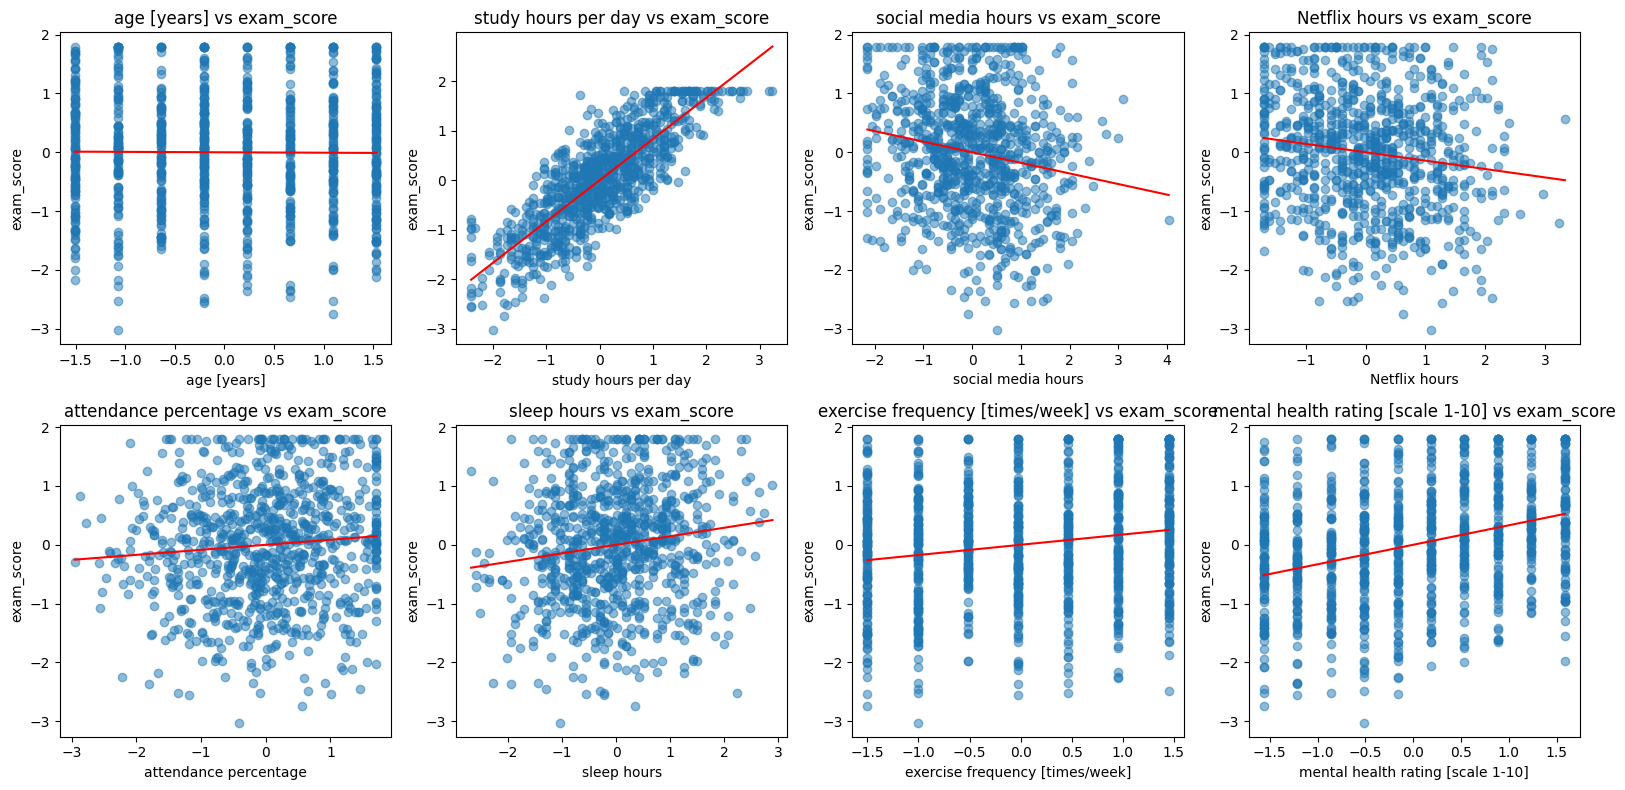

In [19]:
w_star = gradient_xs_naive[-1]  # final weight vector

num_features = A.shape[1] - 1
num_cols = 4
num_rows = math.ceil(num_features / num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(4*num_cols, 4*num_rows))
axes = axes.flatten()

for i in range(num_features):
    x_i = A[:, i+1]  # i-th standardized feature
    y = b             # standardized target
    
    axes[i].scatter(x_i, y, alpha=0.5)
    axes[i].set_xlabel(numeric_cols[i])
    axes[i].set_ylabel('exam_score')
    axes[i].set_title(f'{numeric_cols[i]} vs exam_score')
    
    # Calculate points for regression line:
    x_vals = np.array([x_i.min(), x_i.max()])
    y_vals = w_star[0] + w_star[i+1] * x_vals  # y = w0 + wi * x
    
    axes[i].plot(x_vals, y_vals, color='red')

# Remove unused axes
for j in range(num_features, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Now try doing gradient descent with a better learning rate instead of a fixed $\gamma$.

# Gradient descent with smoothness constant $L$

In [20]:
def calculate_L(A, b):
    """Calculate the smoothness constant for f"""
    L = np.linalg.norm(A.T.dot(A), ord=2)
    return L

In [21]:
# Define the parameters of the algorithm.
max_iters = 10

L = calculate_L(A, b)
gamma_smooth = 1/calculate_L(A,b)

# Initialization
x_initial = np.zeros(A.shape[1])

# Start gradient descent.
gradient_objectives_smooth, gradient_xs_smooth = gradient_descent(A, x_initial, b, max_iters, gamma_smooth)

Gradient Descent(1/10): objective=454.50000, x=[0.00000, -0.01178, 0.75540, -0.15758, -0.15291, 0.08812, 0.11226, 0.14815,
 0.29185]
Gradient Descent(2/10): objective=49.88179, x=[-0.00000, -0.00732, 0.82449, -0.17760, -0.14565, 0.08579, 0.14021,
 0.17149, 0.32655]
Gradient Descent(3/10): objective=45.57438, x=[-0.00000, -0.00720, 0.83214, -0.17975, -0.14291, 0.08561, 0.14432,
 0.17384, 0.33100]
Gradient Descent(4/10): objective=45.51154, x=[-0.00000, -0.00724, 0.83304, -0.18005, -0.14243, 0.08562, 0.14491,
 0.17406, 0.33156]
Gradient Descent(5/10): objective=45.51050, x=[-0.00000, -0.00725, 0.83315, -0.18009, -0.14235, 0.08563, 0.14499,
 0.17408, 0.33163]
Gradient Descent(6/10): objective=45.51048, x=[-0.00000, -0.00725, 0.83316, -0.18010, -0.14234, 0.08563, 0.14500,
 0.17408, 0.33164]
Gradient Descent(7/10): objective=45.51048, x=[-0.00000, -0.00725, 0.83316, -0.18010, -0.14234, 0.08563, 0.14501,
 0.17408, 0.33164]

✅ Convergence reached after 7 iterations.


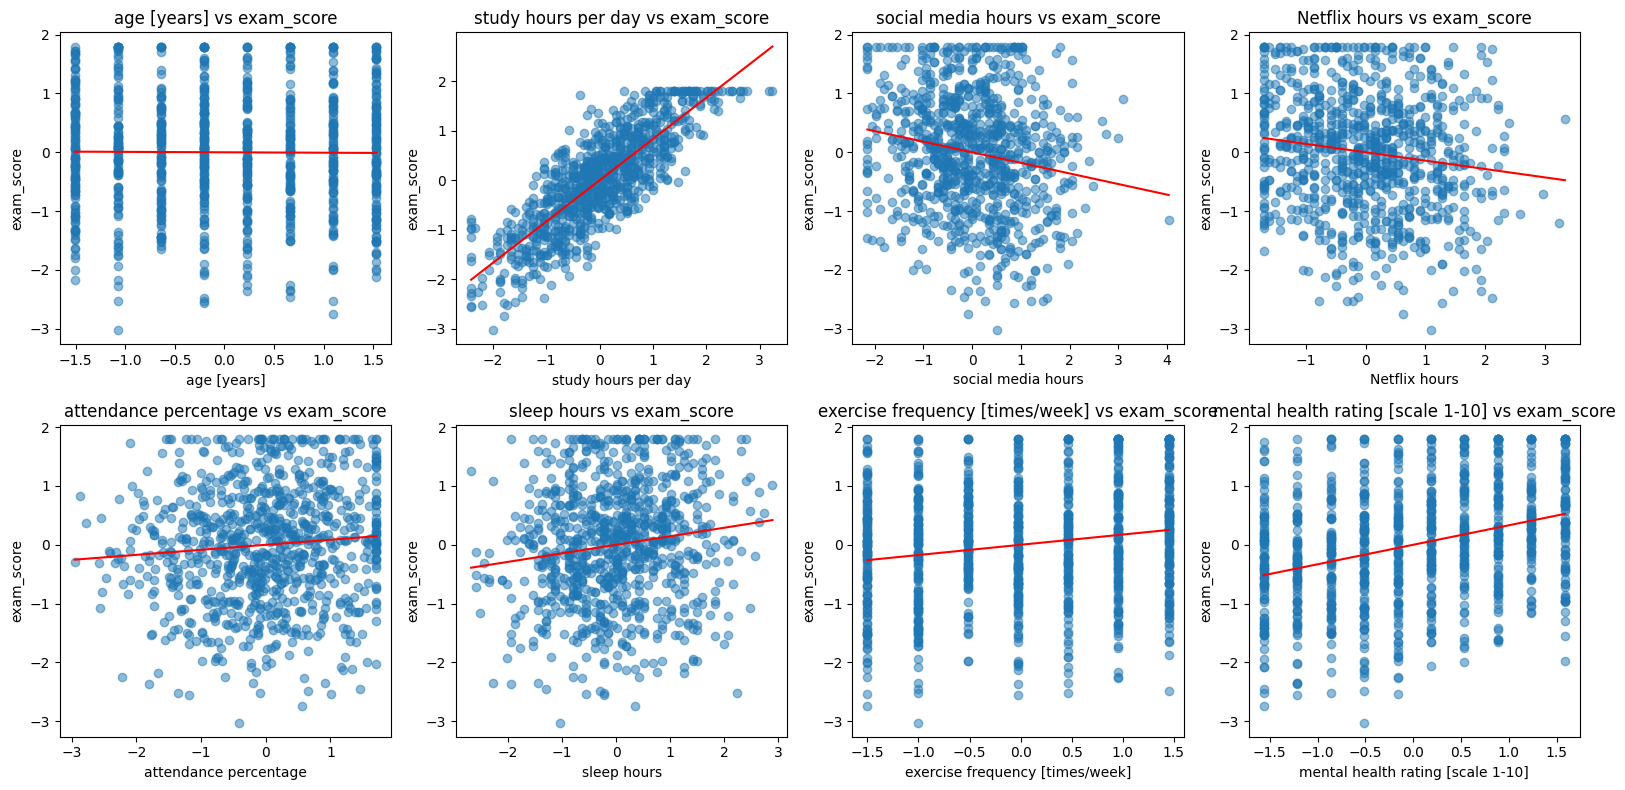

In [22]:
w_star = gradient_xs_smooth[-1]  # final weight vector

num_features = A.shape[1] - 1
num_cols = 4
num_rows = math.ceil(num_features / num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(4*num_cols, 4*num_rows))
axes = axes.flatten()

for i in range(num_features):
    x_i = A[:, i+1]  # i-th standardized feature
    y = b             # standardized target
    
    axes[i].scatter(x_i, y, alpha=0.5)
    axes[i].set_xlabel(numeric_cols[i])
    axes[i].set_ylabel('exam_score')
    axes[i].set_title(f'{numeric_cols[i]} vs exam_score')
    
    # Calculate points for regression line:
    x_vals = np.array([x_i.min(), x_i.max()])
    y_vals = w_star[0] + w_star[i+1] * x_vals  # y = w0 + wi * x
    
    axes[i].plot(x_vals, y_vals, color='red')

# Remove unused axes
for j in range(num_features, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


## Assuming bounded gradients (Lipschitz function)

In [23]:
max_iters = 1000
R = 25

# Compute the bound B on the gradient norm
B = (R*np.linalg.norm(np.dot(A.T,A)) + np.linalg.norm(np.dot(A.T,b)))

#  Compute learning rate based on bounded gradient
gamma_bounded = R/(B*np.sqrt(max_iters))

# Start gradient descent.
gradient_objectives_bounded, gradient_xs_bounded = gradient_descent(A, x_initial, b, max_iters, gamma_bounded)

Gradient Descent(1/1000): objective=454.50000, x=[0.00000, -0.00013, 0.00855, -0.00178, -0.00173, 0.00100, 0.00127, 0.00168,
 0.00330]
Gradient Descent(2/1000): objective=446.17280, x=[0.00000, -0.00026, 0.01702, -0.00355, -0.00344, 0.00198, 0.00253, 0.00334,
 0.00658]
Gradient Descent(3/1000): objective=438.01543, x=[0.00000, -0.00039, 0.02540, -0.00530, -0.00513, 0.00296, 0.00378, 0.00498,
 0.00982]
Gradient Descent(4/1000): objective=430.02443, x=[0.00000, -0.00052, 0.03369, -0.00703, -0.00680, 0.00392, 0.00502, 0.00661,
 0.01302]
Gradient Descent(5/1000): objective=422.19640, x=[0.00000, -0.00065, 0.04190, -0.00875, -0.00845, 0.00487, 0.00625, 0.00823,
 0.01620]
Gradient Descent(6/1000): objective=414.52801, x=[0.00000, -0.00077, 0.05002, -0.01044, -0.01008, 0.00582, 0.00747, 0.00983,
 0.01934]
Gradient Descent(7/1000): objective=407.01599, x=[0.00000, -0.00089, 0.05806, -0.01213, -0.01170, 0.00675, 0.00867, 0.01141,
 0.02245]
Gradient Descent(8/1000): objective=399.65715, x=[0.000

We realize that since the step size used is significantly smaller than the typical `1/L` choice due to its dependency on `1/√max_iters`. This results in slower but more stable convergence, requiring many more iterations (around 700) to reach the optimum. We recognize this trade-off between stability and speed in our approach.


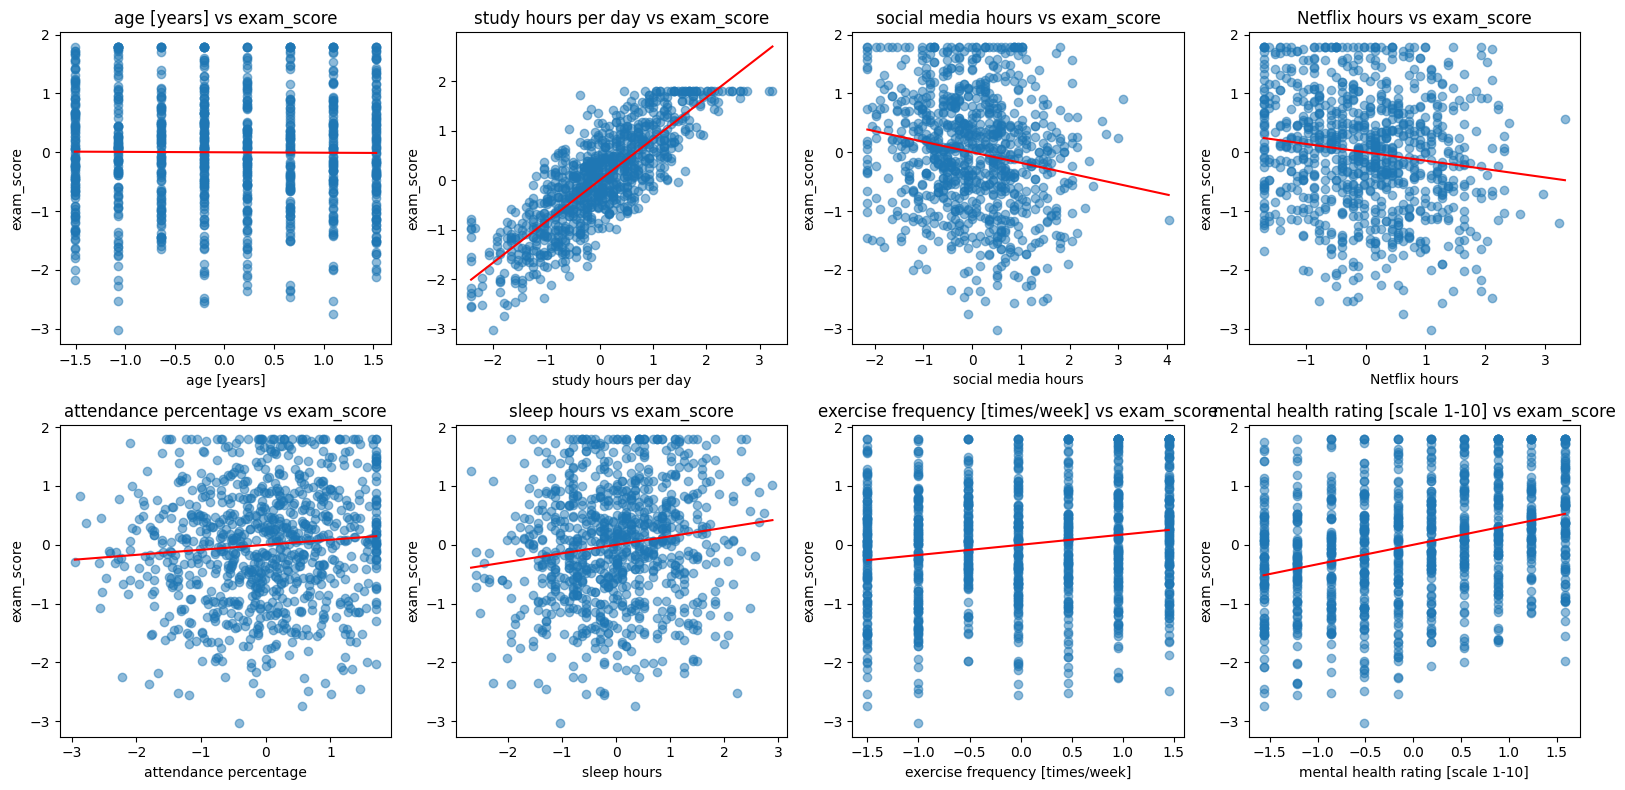

In [24]:
w_star = gradient_xs_bounded[-1]  # final weight vector

num_features = A.shape[1] - 1
num_cols = 4
num_rows = math.ceil(num_features / num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(4*num_cols, 4*num_rows))
axes = axes.flatten()

for i in range(num_features):
    x_i = A[:, i+1]  # i-th standardized feature
    y = b             # standardized target
    
    axes[i].scatter(x_i, y, alpha=0.5)
    axes[i].set_xlabel(numeric_cols[i])
    axes[i].set_ylabel('exam_score')
    axes[i].set_title(f'{numeric_cols[i]} vs exam_score')
    
    # Calculate points for regression line:
    x_vals = np.array([x_i.min(), x_i.max()])
    y_vals = w_star[0] + w_star[i+1] * x_vals  # y = w0 + wi * x
    
    axes[i].plot(x_vals, y_vals, color='red')

# Remove unused axes
for j in range(num_features, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


# Comparison

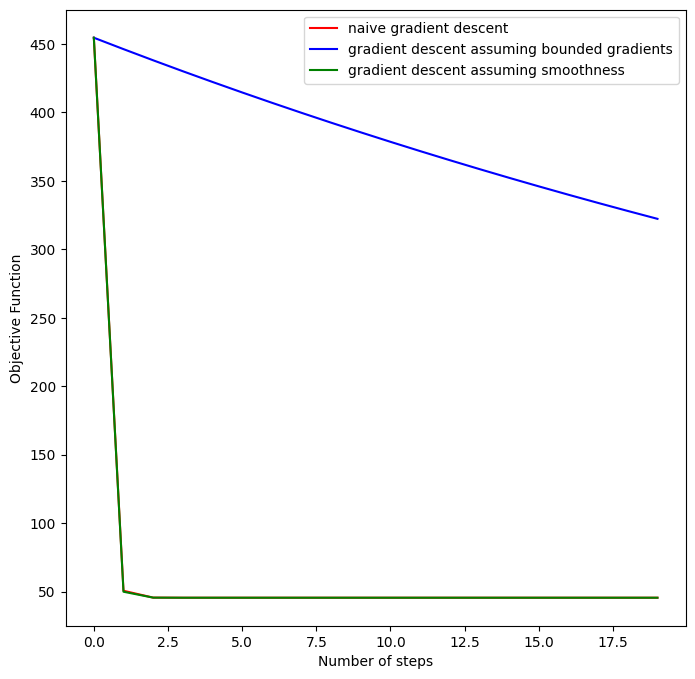

In [25]:
max_steps = 20

# Extend each list to 20 by repeating the last value if it's shorter
naive = gradient_objectives_naive + [gradient_objectives_naive[-1]] * (max_steps - len(gradient_objectives_naive)) if len(gradient_objectives_naive) < max_steps else gradient_objectives_naive[:max_steps]
bounded = gradient_objectives_bounded + [gradient_objectives_bounded[-1]] * (max_steps - len(gradient_objectives_bounded)) if len(gradient_objectives_bounded) < max_steps else gradient_objectives_bounded[:max_steps]
smooth = gradient_objectives_smooth + [gradient_objectives_smooth[-1]] * (max_steps - len(gradient_objectives_smooth)) if len(gradient_objectives_smooth) < max_steps else gradient_objectives_smooth[:max_steps]

plt.figure(figsize=(8, 8))
plt.xlabel('Number of steps')
plt.ylabel('Objective Function')

plt.plot(range(max_steps), naive, 'red', label='naive gradient descent')
plt.plot(range(max_steps), bounded, 'blue', label='gradient descent assuming bounded gradients')
plt.plot(range(max_steps), smooth, 'green', label='gradient descent assuming smoothness')

plt.legend(loc='upper right')
plt.show()

# Performance Comparison

We performed two tests to evaluate the execution time of the algorithm under different conditions:

- **Naive Test:** The algorithm took **26 ms** to complete.
- **Smooth Constant L Test:** By applying a smoothing constant \( L \), the algorithm's execution time improved, completing in **7 ms**.
- **bounded gradients (Lipschitz function):** By assuming bounded gradients (Lipschitz function) it complete in **59 ms**.

This shows that using the smooth constant \( L \) approach results in a faster convergence or more efficient computation compared to the naive implementation.

# EXTRA DA TOGLIERE

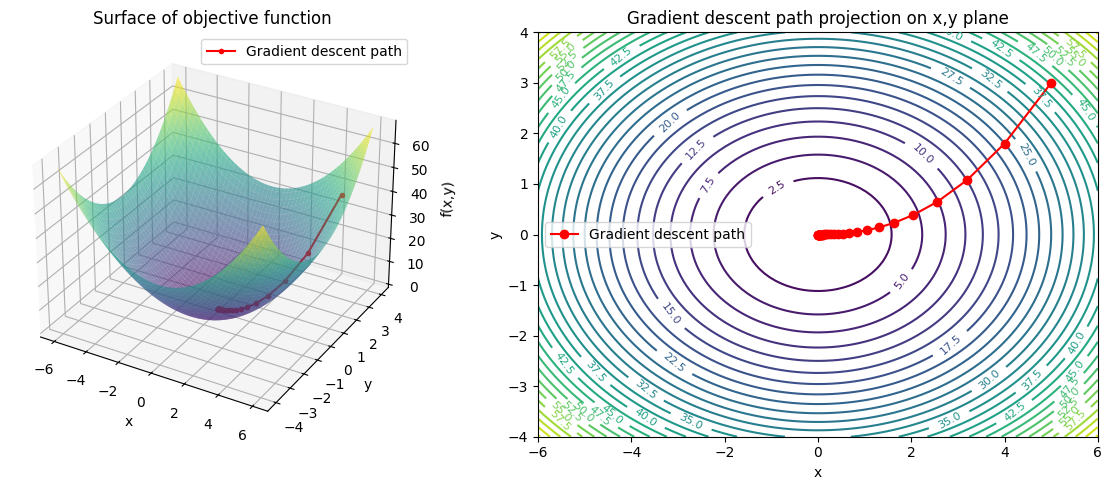

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Funzione quadratica 2D esempio
def objective(x):
    # x è vettore [x0, x1]
    return x[0]**2 + 2*x[1]**2

# Gradiente della funzione
def gradient(x):
    return np.array([2*x[0], 4*x[1]])

# Gradient descent semplice
def gradient_descent_2d(x0, gamma, max_iters=30, tol=1e-8):
    xs = [x0]
    objectives = [objective(x0)]
    
    x = x0
    for _ in range(max_iters):
        grad = gradient(x)
        x = x - gamma * grad
        xs.append(x)
        objectives.append(objective(x))
        if abs(objectives[-1] - objectives[-2]) < tol:
            break
    return np.array(xs), objectives

# Parametri
x0 = np.array([5.0, 3.0])
gamma = 0.1
max_iters = 30

# Calcolo percorso discesa gradiente
xs, objs = gradient_descent_2d(x0, gamma, max_iters)

# Creazione griglia per superficie
x_grid = np.linspace(-6, 6, 100)
y_grid = np.linspace(-4, 4, 100)
X, Y = np.meshgrid(x_grid, y_grid)
Z = X**2 + 2*Y**2

# Plot 3D
fig = plt.figure(figsize=(12,5))

ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, Z, alpha=0.6, cmap='viridis')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('f(x,y)')
ax1.set_title('Surface of objective function')

# Traiettoria discesa gradiente 3D
ax1.plot(xs[:,0], xs[:,1], objs, 'r.-', label='Gradient descent path')
ax1.legend()

# Plot 2D percorso su piano x,y
ax2 = fig.add_subplot(122)
contour = ax2.contour(X, Y, Z, levels=30, cmap='viridis')
ax2.clabel(contour, inline=True, fontsize=8)
ax2.plot(xs[:,0], xs[:,1], 'ro-', label='Gradient descent path')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('Gradient descent path projection on x,y plane')
ax2.legend()

plt.tight_layout()
plt.show()